<a href="https://colab.research.google.com/github/JohnSubhani/JohnSubhani/blob/main/Chennai%20house%20price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHENNAI HOUSE PRICE PREDICTION

IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
# uploading the file
data=pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
data.shape

(7109, 22)

In [5]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

DATA CLEANING


CORRECTING SPELLING MISTAKES

AREA

In [7]:
data.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [8]:
spelling_area={"Chrompt":"Chrompet", "Chrmpet":"Chrompet", "Chormpet":"Chrompet",
               "Karapakam":"Karapakkam","TNagar":"T Nagar","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Adyr":"Adyar","Velchery":"Velachery","KKNagar":"KK Nagar"}
data["AREA"]=data.AREA.replace(spelling_area)
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

SALE CONDITION

In [9]:
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [10]:
spelling_salecond={"Adj Land":"AdjLand","Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial"}
data["SALE_COND"]=data.SALE_COND.replace(spelling_salecond)
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

PARKING FACILITY

In [11]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [12]:
spelling_parkfacil={"Noo":"No"}
data["PARK_FACIL"]=data.PARK_FACIL.replace(spelling_parkfacil)
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

UTILITY AVAILABLE

In [13]:
data.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [14]:
spelling_utilityavail={"All Pub":"AllPub"}
data["UTILITY_AVAIL"]=data.UTILITY_AVAIL.replace(spelling_utilityavail)
data.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

STREET

In [15]:
data.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [16]:
spelling_STREET={"Pavd":"Paved","NoAccess":"No Access"}
data["STREET"]=data.STREET.replace(spelling_STREET)
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

BUILDING TYPE

In [17]:
data.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [18]:
spelling_buildtype={"Other":"Others","Comercial":"Commercial"}
data["BUILDTYPE"]=data.BUILDTYPE.replace(spelling_buildtype)
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

MZZONE

In [19]:
data.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

DUPLICATE AND MISSING VALUE


CHECKING DUPLICATE VALUE

In [20]:
data.duplicated().any()

False

CHECKING NULL VALUES

In [21]:
data.isnull().any()

PRT_ID           False
AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM         True
N_BATHROOM        True
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL        True
REG_FEE          False
COMMIS           False
SALES_PRICE      False
dtype: bool

In [22]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

CHANGING N_BEDROOM AND N_BATHROOM TO TYPE INT

FILLING THE MISSING VALUES 

N-BEDROOM

In [23]:
data.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [24]:
data.N_BEDROOM.mode()

0    1.0
dtype: float64

In [25]:
data['N_BEDROOM'] = data["N_BEDROOM"].replace(np.nan,data.N_BEDROOM.mode().values[0])

In [26]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

N_BATHROOM

In [27]:
data.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [28]:
data.N_BATHROOM.mode()

0    1.0
dtype: float64

In [29]:
data['N_BATHROOM'] = data["N_BATHROOM"].replace(np.nan,data.N_BATHROOM.mode().values[0])

In [30]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

QS_OVERALL

In [31]:
data.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [32]:
data.QS_OVERALL.mean()

3.5032537884152344

In [33]:
data["QS_OVERALL"] = data["QS_OVERALL"].replace(np.nan,data.QS_OVERALL.mean())

In [34]:
data.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [35]:
# Changing the float datatype to int
data["N_BEDROOM"] = data.N_BEDROOM.apply(int)
data["N_BATHROOM"] = data.N_BATHROOM.apply(int)

ADDING REG_FEES AND COMMISION TO SALES_PRICE

Here Regfees and commision doesnt make any sense seperately .Thus add them with Salesprice.

In [36]:
data["SALES_PRICE"] = data.REG_FEE + data.COMMIS+ data.SALES_PRICE

In [37]:
data["SALES_PRICE"]

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: SALES_PRICE, Length: 7109, dtype: int64

AGE OF THE HOUSE

In [38]:
data["AGE"] = pd.DatetimeIndex(data["DATE_SALE"]).year - pd.DatetimeIndex(data["DATE_BUILD"]).year

In [39]:
data["AGE"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7109, dtype: int64

DROPPING THE UNWANTED TERMS

In [40]:
data1= data.drop(["PRT_ID","REG_FEE","COMMIS","DATE_SALE","DATE_BUILD"],axis=1)

In [41]:
data1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5668827,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,11370222,9
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8835792,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,9051448,32


EXPLORATORY DATA ANALYSIS(EDA)

##AREA VS SALESPRICE

AREA VS SALESPRICE PLOT

In [42]:
order = data1[["AREA","SALES_PRICE"]].groupby("AREA").mean().sort_values("SALES_PRICE").reset_index()

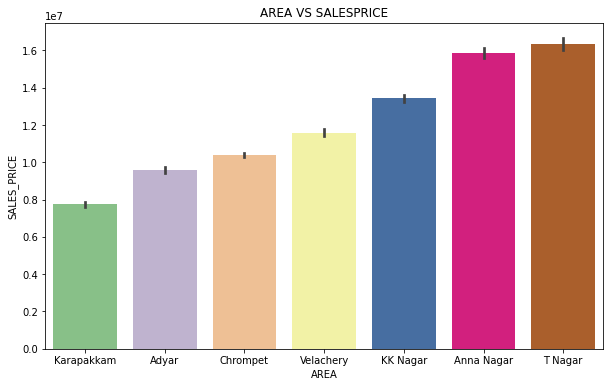

In [43]:
plt.figure(figsize=(10,6))
sns.barplot( data = data1, x="AREA",y="SALES_PRICE",order=order.AREA,palette="Accent")
plt.title("AREA VS SALESPRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

DISTRIBUTION PLOT OF AREA

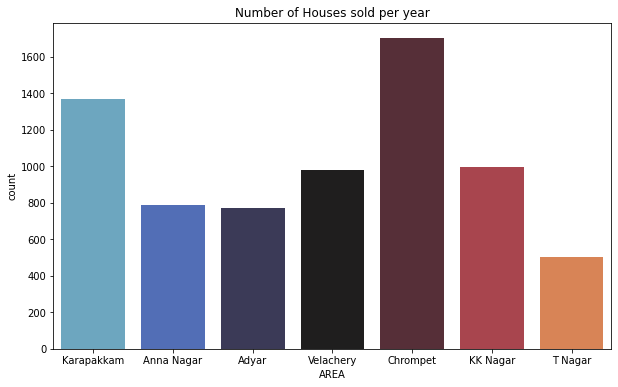

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="AREA", palette='icefire')
plt.title("Number of Houses sold per year")
plt.show()

###INT_SQFT

DISTRIBUTION PLOT OF INT_SQFT

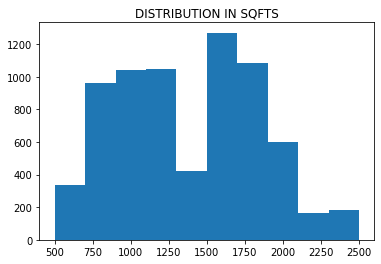

In [45]:
plt.hist(data1["INT_SQFT"])
#data1.INT_SQFT.value_counts().plot(kind="dist_plot",autopct="%.0f", figsize=(9,4))
plt.title("DISTRIBUTION IN SQFTS")
plt.show()

INT_SQFT VS SALESPRICE

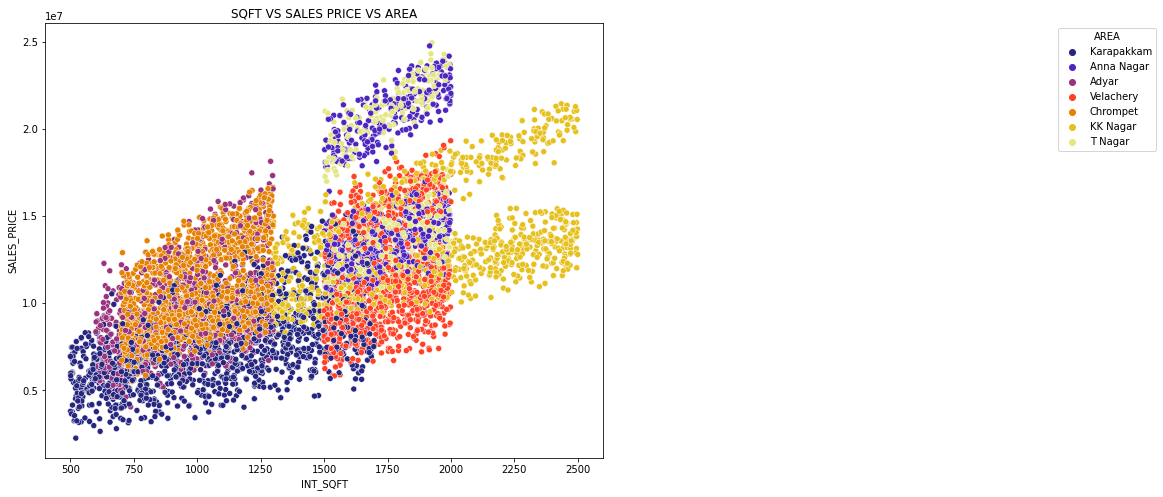

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data1, x="INT_SQFT", y="SALES_PRICE", hue="AREA", palette="CMRmap")
plt.title("SQFT VS SALES PRICE VS AREA")
plt.legend(title="AREA",bbox_to_anchor=(2,1))
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Non-Linear

##DISTANCE_MAINROAD

DISTRIBUTION PLOT OF DISTANCE_MAINROAD

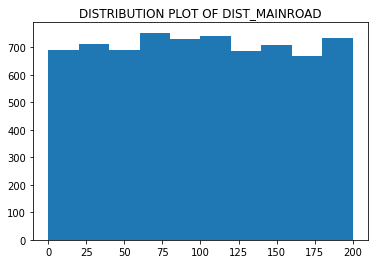

In [47]:
plt.hist(data1["DIST_MAINROAD"])
plt.title("DISTRIBUTION PLOT OF DIST_MAINROAD")
plt.show()

DISTANCE VS SALESPRICE PLOT

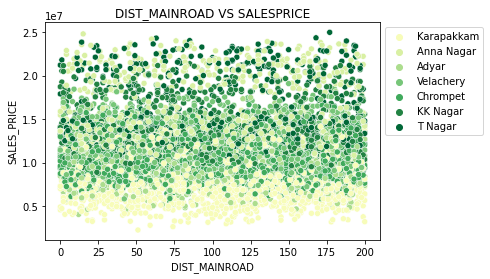

In [48]:
#plt.figure(figsize=(10,6))
sns.scatterplot(x="DIST_MAINROAD",y="SALES_PRICE", data=data1, hue="AREA",palette="YlGn")
plt.title("DIST_MAINROAD VS SALESPRICE")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:NO
2.Linear/Non-linear Relationship:Non-Linear

##N_BEDROOM

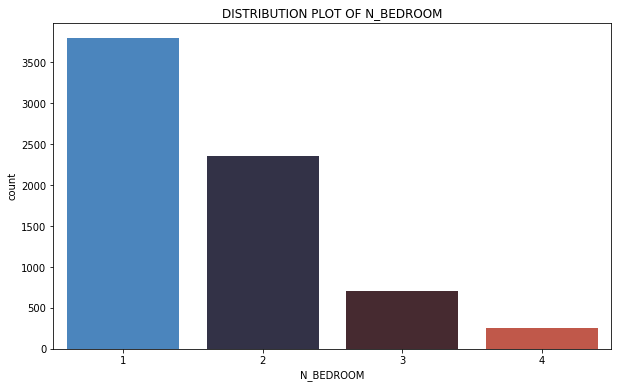

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="N_BEDROOM", palette='icefire')
plt.title("DISTRIBUTION PLOT OF N_BEDROOM")
plt.show()

In [50]:
order = data[["N_BEDROOM","SALES_PRICE"]].groupby("N_BEDROOM").mean().sort_values("SALES_PRICE").reset_index()

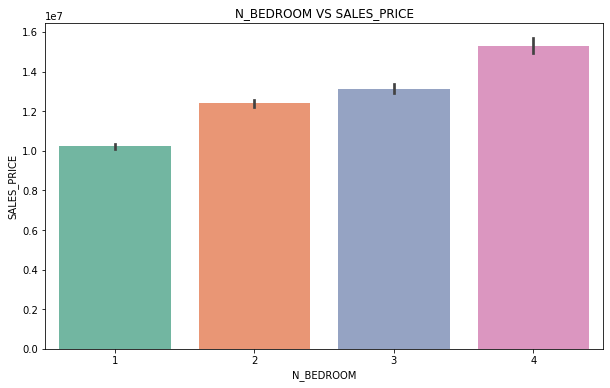

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data=data1, x="N_BEDROOM",y="SALES_PRICE",order=order.N_BEDROOM, palette="Set2")
plt.title("N_BEDROOM VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

###N_BATHROOM

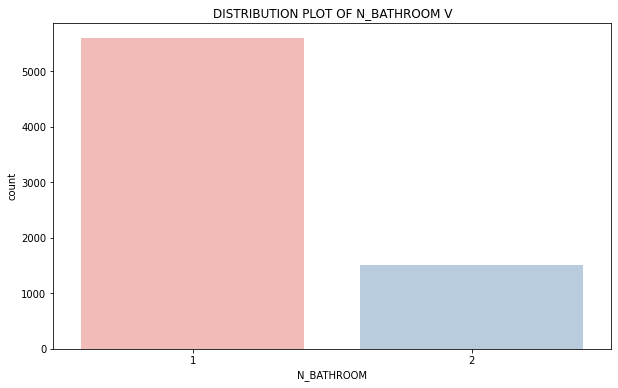

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="N_BATHROOM", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF N_BATHROOM V")
plt.show()

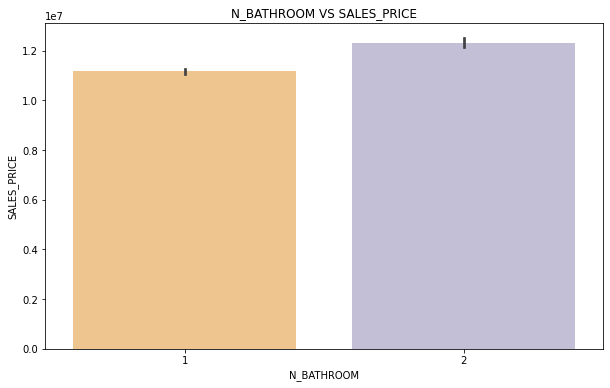

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=data1, x="N_BATHROOM",y="SALES_PRICE", palette="PuOr")
plt.title("N_BATHROOM VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

SALE CONDITION

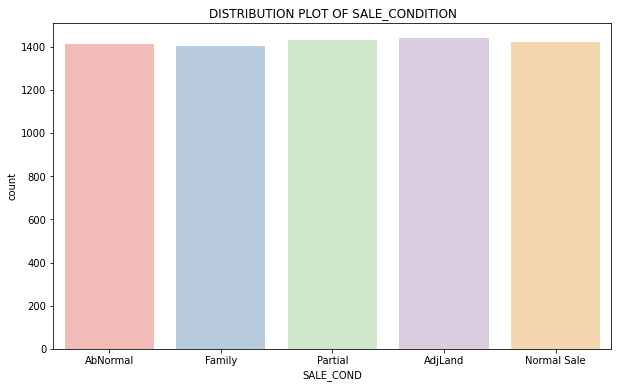

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="SALE_COND", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF SALE_CONDITION")
plt.show()

In [55]:
order = data1[["SALE_COND","SALES_PRICE"]].groupby("SALE_COND").mean().sort_values("SALES_PRICE").reset_index()

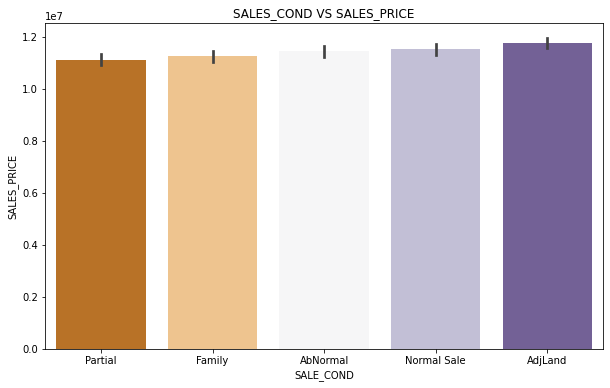

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=data1, x="SALE_COND",y="SALES_PRICE", order=order.SALE_COND,palette="PuOr")
plt.title("SALES_COND VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

PARKING FACILITY

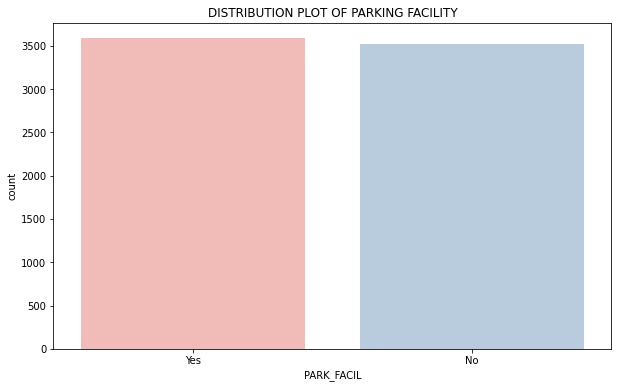

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="PARK_FACIL", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF PARKING FACILITY")
plt.show()

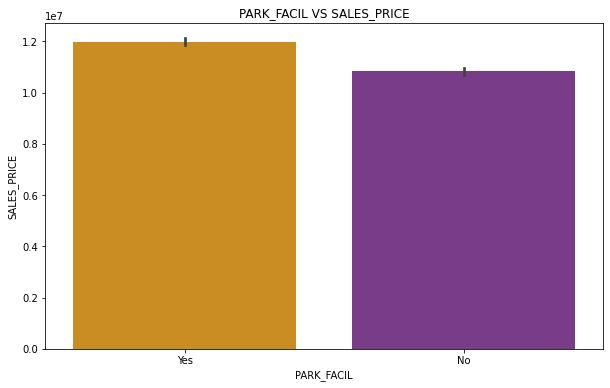

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(data=data1, x="PARK_FACIL",y="SALES_PRICE", palette="CMRmap_r")
plt.title("PARK_FACIL VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

BUILDTYPE

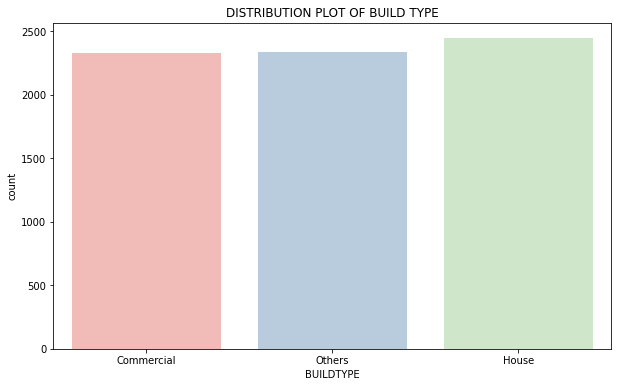

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="BUILDTYPE", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF BUILD TYPE")
plt.show()

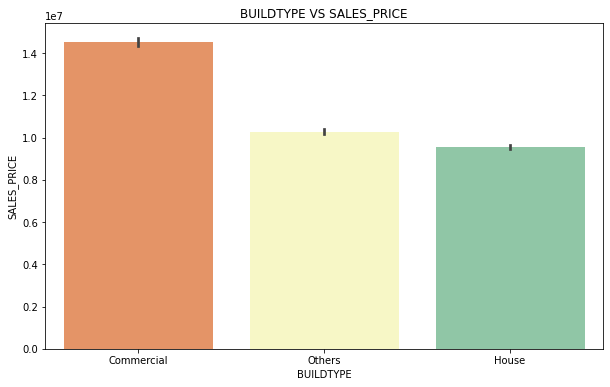

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(data=data1, x="BUILDTYPE",y="SALES_PRICE", palette="Spectral")
plt.title("BUILDTYPE VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:One-hot Encoding

UTILITIES AVAILABLE

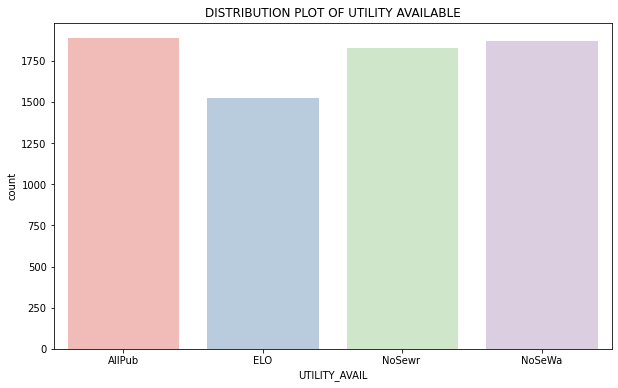

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="UTILITY_AVAIL", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF UTILITY AVAILABLE")
plt.show()

In [62]:
order = data1[["UTILITY_AVAIL","SALES_PRICE"]].groupby("UTILITY_AVAIL").mean().sort_values("SALES_PRICE").reset_index()

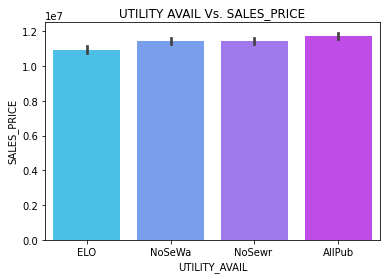

In [63]:
sns.barplot(x="UTILITY_AVAIL" ,y="SALES_PRICE",order=order.UTILITY_AVAIL,data=data1, palette="cool")
plt.title("UTILITY AVAIL Vs. SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

STREET

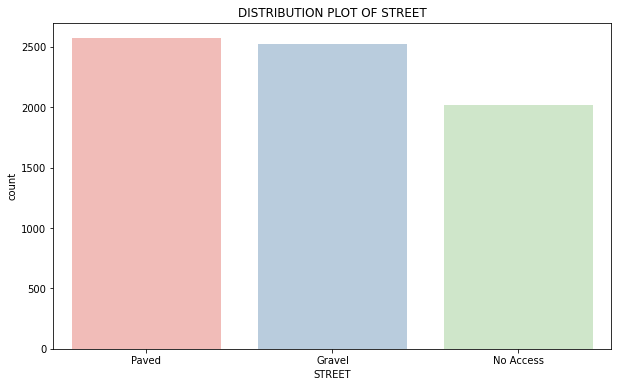

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="STREET", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF STREET")
plt.show()

In [65]:
order = data1[["STREET","SALES_PRICE"]].groupby("STREET").mean().sort_values("SALES_PRICE").reset_index()

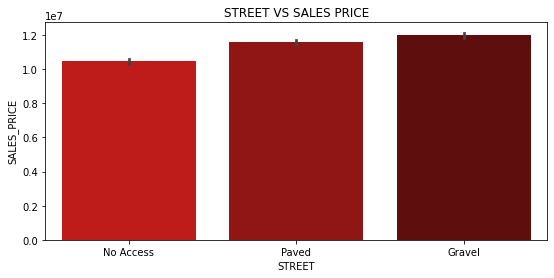

In [66]:
plt.figure(figsize=(9,4)) 
sns.barplot(x="STREET", y="SALES_PRICE", data=data1,order=order.STREET,palette="flag") 
plt.title("STREET VS SALES PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

MZZONE

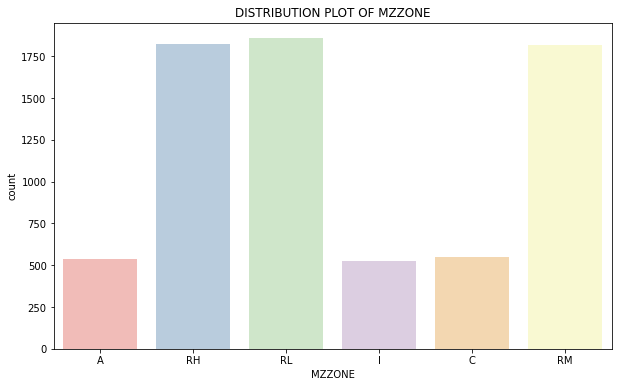

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1, x="MZZONE", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF MZZONE")
plt.show()

In [68]:
order = data1[["MZZONE","SALES_PRICE"]].groupby("MZZONE").mean().sort_values("SALES_PRICE").reset_index()

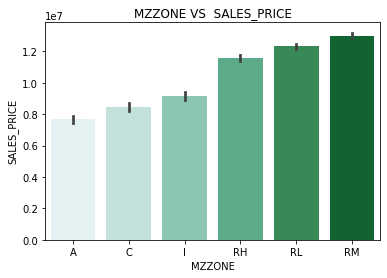

In [69]:
sns.barplot(x="MZZONE" ,y="SALES_PRICE",data=data1, order=order.MZZONE,palette="BuGn")
plt.title("MZZONE VS  SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:YES
2.Linear/Non-linear Relationship:Linear
3.Type of encoding:Label Encoding

AGE OF HOUSE

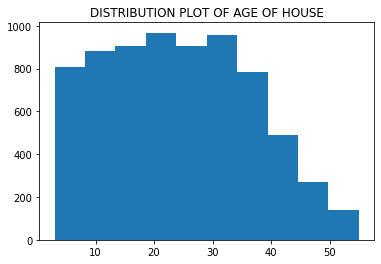

In [70]:
plt.hist(data1["AGE"])
#plt.figure(figsize=(10,6))
#(data=data1, x="AGE", palette='Pastel1')
plt.title("DISTRIBUTION PLOT OF AGE OF HOUSE")
plt.show()

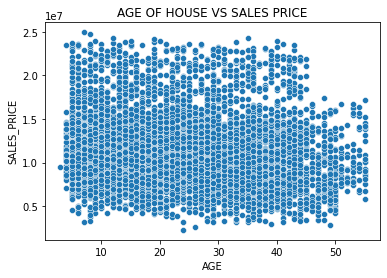

In [71]:
sns.scatterplot(data=data1, x="AGE", y="SALES_PRICE")
plt.title("AGE OF HOUSE VS SALES PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:No
2.Linear/Non-linear Relationship:Non-Linear

QS_ROOM

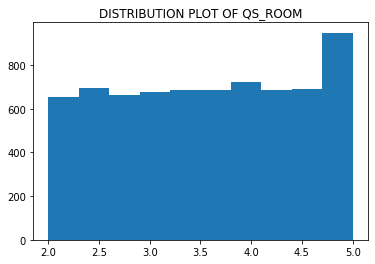

In [72]:
plt.hist(data1["QS_ROOMS"])
plt.title("DISTRIBUTION PLOT OF QS_ROOM")
plt.show()

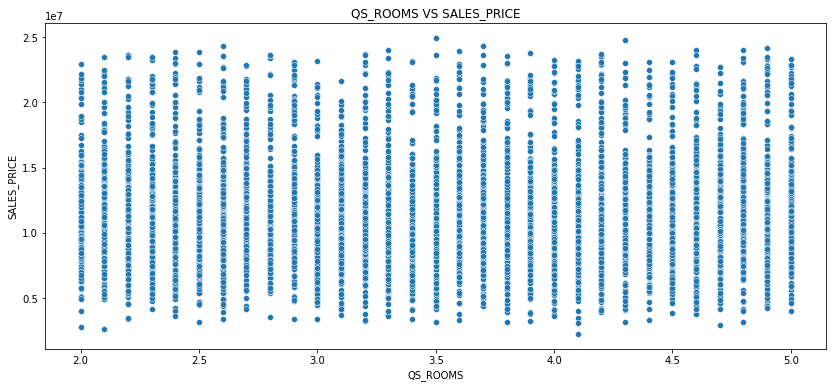

In [73]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=data1, x="QS_ROOMS", y="SALES_PRICE")
plt.title("QS_ROOMS VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:No
2.Linear/Non-linear Relationship:Non-Linear

QS_BEDROOM

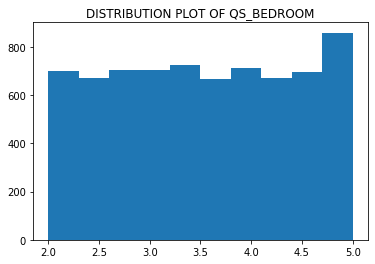

In [74]:
plt.hist(data1["QS_BEDROOM"])
plt.title("DISTRIBUTION PLOT OF QS_BEDROOM")
plt.show()

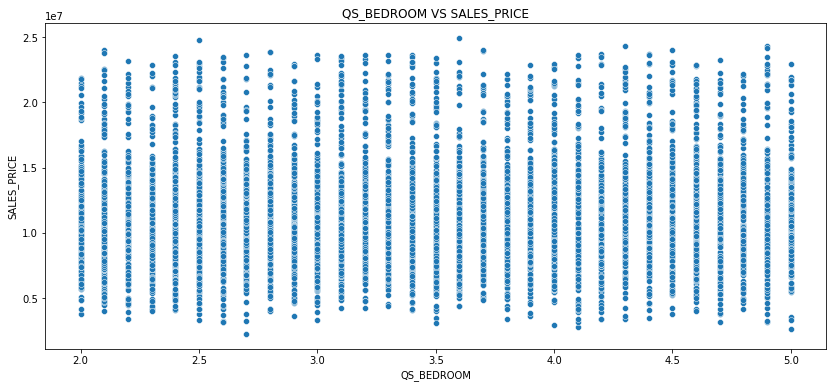

In [75]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=data1, x="QS_BEDROOM", y="SALES_PRICE")
plt.title("QS_BEDROOM VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:No
2.Linear/Non-linear Relationship:Non-Linear

QS_BATHROOM

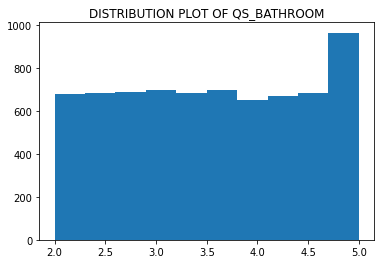

In [76]:
plt.hist(data1["QS_BATHROOM"])
plt.title("DISTRIBUTION PLOT OF QS_BATHROOM")
plt.show()

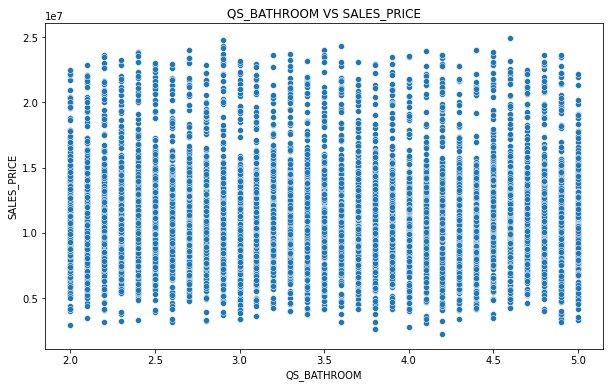

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data1, x="QS_BATHROOM", y="SALES_PRICE")
plt.title("QS_BATHROOM VS SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:No
2.Linear/Non-linear Relationship:Non-Linear

QS_OVERALL

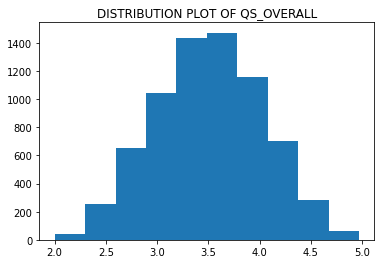

In [78]:
plt.hist(data1["QS_OVERALL"])
plt.title("DISTRIBUTION PLOT OF QS_OVERALL")
plt.show()

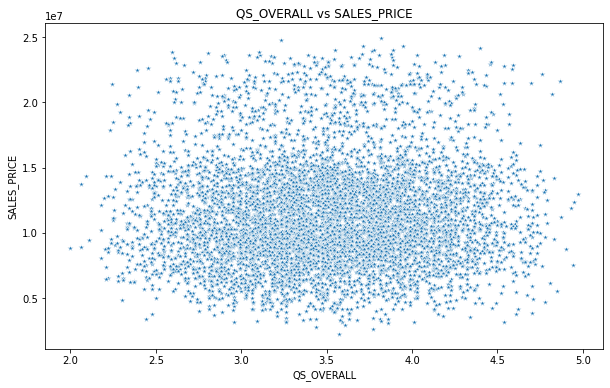

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data1, x="QS_OVERALL", y="SALES_PRICE", marker='*')
plt.title("QS_OVERALL vs SALES_PRICE")
plt.show()

From this graph ,it is found that:
1.Relationship between feature and target:No
2.Linear/Non-linear Relationship:Non-Linear

Copy the data to a new csv file

In [80]:
fdata=data1.copy()
fdata

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5668827,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,11370222,9
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8835792,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,9051448,32


In [81]:
fdata.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,30


In [82]:
def mapp(col):
    m= {}
    for i in col:
        print(i)
        val = int(input())
        m[i] = val
    
    return m

In [83]:
AREA_mapp= mapp(col=fdata.AREA.unique().tolist())
print(AREA_mapp)

Karapakkam
1
Anna Nagar
6
Adyar
2
Velachery
4
Chrompet
3
KK Nagar
5
T Nagar
7
{'Karapakkam': 1, 'Anna Nagar': 6, 'Adyar': 2, 'Velachery': 4, 'Chrompet': 3, 'KK Nagar': 5, 'T Nagar': 7}


In [84]:
SALECONDITION_mapp= mapp(col=fdata.SALE_COND.unique().tolist())
print(SALECONDITION_mapp)

AbNormal
3
Family
2
Partial
1
AdjLand
5
Normal Sale
4
{'AbNormal': 3, 'Family': 2, 'Partial': 1, 'AdjLand': 5, 'Normal Sale': 4}


In [85]:
PARKFACIL_mapp = mapp(fdata.PARK_FACIL.unique().tolist())
print(PARKFACIL_mapp)

Yes
1
No
0
{'Yes': 1, 'No': 0}


In [86]:
UTILITYAVAIL_mapp = mapp(fdata.UTILITY_AVAIL.unique().tolist())
print(UTILITYAVAIL_mapp)

AllPub
4
ELO
1
NoSewr 
3
NoSeWa
2
{'AllPub': 4, 'ELO': 1, 'NoSewr ': 3, 'NoSeWa': 2}


In [87]:
MZZONE_mapp= mapp(fdata.MZZONE.unique().tolist())
print(MZZONE_mapp)

A
1
RH
4
RL
5
I
3
C
2
RM
6
{'A': 1, 'RH': 4, 'RL': 5, 'I': 3, 'C': 2, 'RM': 6}


In [88]:
STREET_mapp= mapp(fdata.STREET.unique().tolist())
print(STREET_mapp)

Paved
2
Gravel
3
No Access
1
{'Paved': 2, 'Gravel': 3, 'No Access': 1}


##ENCODING

LABEL ENCODING

In [89]:
fdata["AREA"] = fdata.AREA.map(AREA_mapp)
fdata["SALE_COND"] = fdata.SALE_COND.map(SALECONDITION_mapp)
fdata["PARK_FACIL"] = fdata.PARK_FACIL.map(PARKFACIL_mapp)
fdata["UTILITY_AVAIL"] = fdata.UTILITY_AVAIL.map(UTILITYAVAIL_mapp)
fdata["MZZONE"] = fdata.MZZONE.map(MZZONE_mapp)
fdata["STREET"] = fdata.STREET.map(STREET_mapp)

In [90]:
fdata.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,1,1004,131,1,1,3,3,1,Commercial,4,2,1,4.0,3.9,4.9,4.330,8124400,44
1,6,1986,26,2,1,5,3,0,Commercial,4,3,4,4.9,4.2,2.5,3.765,22781941,11
2,2,909,70,1,1,3,3,1,Commercial,1,3,5,4.1,3.8,2.2,3.090,13672408,20
3,4,1855,14,3,2,5,2,0,Others,3,2,3,4.7,3.9,3.6,4.010,10063653,22
4,1,1226,84,1,1,3,3,1,Others,4,3,2,3.0,2.5,4.1,3.290,7717313,30


ONE_HOT ENCODING

In [91]:
fdata=pd.get_dummies(fdata)
fdata.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,3,1,4,2,1,4.0,3.9,4.9,4.330,8124400,44,1,0,0
1,6,1986,26,2,1,5,3,0,4,3,4,4.9,4.2,2.5,3.765,22781941,11,1,0,0
2,2,909,70,1,1,3,3,1,1,3,5,4.1,3.8,2.2,3.090,13672408,20,1,0,0
3,4,1855,14,3,2,5,2,0,3,2,3,4.7,3.9,3.6,4.010,10063653,22,0,0,1
4,1,1226,84,1,1,3,3,1,4,3,2,3.0,2.5,4.1,3.290,7717313,30,0,0,1


Dropping the unwanted terms

In [92]:
fdata=fdata.drop(["DIST_MAINROAD","QS_OVERALL","QS_ROOMS","QS_BATHROOM","QS_BEDROOM"], axis=1)

In [93]:
fdata.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,1,4,2,1,8124400,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,22781941,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,13672408,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,10063653,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,7717313,30,0,0,1


Saving to anew .csv file

In [94]:
fdata.to_csv("housedata_chennai.csv", index=False)

In [95]:
fdata= pd.read_csv("housedata_chennai.csv")
fdata.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,1,4,2,1,8124400,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,22781941,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,13672408,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,10063653,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,7717313,30,0,0,1


transformation

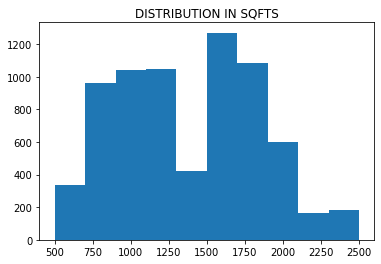

In [96]:
plt.hist(fdata["INT_SQFT"])
plt.title("DISTRIBUTION IN SQFTS")
plt.show()

In [97]:
fdata["INT_SQFT"] = np.log(fdata.INT_SQFT)

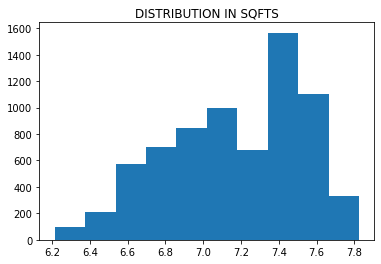

In [98]:
plt.hist(fdata["INT_SQFT"])
plt.title("DISTRIBUTION IN SQFTS")
plt.show()

SPLITTING THE DATA

Splitting the data as train and test data

In [99]:
X =fdata.drop(["SALES_PRICE"], axis=1)
Y = fdata.SALES_PRICE
X.shape, Y.shape

((7109, 14), (7109,))

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle=True, random_state=47, test_size=0.2)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5687, 14), (5687,), (1422, 14), (1422,))

SCALING THE DATA

In [101]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

For better prediction of sales price , we will try different models like linear regression,KNN regression, Decision Tree Regression, Random Forest Regression and XG boost regression

LINEAR REGRESSION

In [102]:
linear= LinearRegression()
linear.fit(X_train,Y_train)
Y_pred = linear.predict(X_test)
print(linear.intercept_)

11392201.571811177


In [103]:
df_linear=pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
df_linear

,Actual,Predicted
3410,9305778,9.574090e+06
5610,11420800,1.089556e+07
72,9466999,9.931466e+06
4268,13685704,1.477550e+07
2399,21694013,1.912750e+07
...,...,...
1422,15210626,1.346375e+07
5422,11560489,1.276078e+07
3056,23614136,1.988884e+07
5404,17633369,1.760532e+07


In [104]:
linear_score = metrics.r2_score(Y_test, Y_pred)
print("Training score: {:.2f}".format(linear.score(X_train,Y_train)))
print("Test score: {:.2f}".format(linear.score(X_test, Y_test)))
print("R2 score: {:.2f}".format(linear_score))

Training score: 0.92
Test score: 0.92
R2 score: 0.92


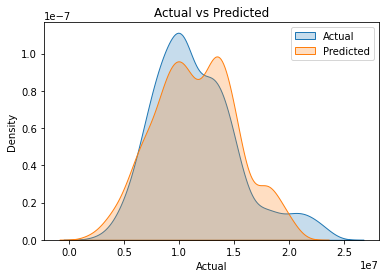

In [105]:
sns.kdeplot(data=df_linear, x='Actual', label='Actual', shade=True)
sns.kdeplot(data=df_linear, x='Predicted', label='Predicted',shade=True)
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

Model has 0.92 as r2 score, the train and test score are also same.

KNN REGRESSOR

In [106]:
knn= KNeighborsRegressor().fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

In [107]:
knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=[2,5,10,15,20,24,25,28,30,]), cv=3)
knn_search.fit(X,Y)
print("Best parameter:", knn_search.best_params_)
print("Best score: ",knn_search.best_score_)

Best parameter: {'n_neighbors': 5}
Best score:  0.7657282906865849


In [108]:
knn= KNeighborsRegressor(n_neighbors=5).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_score = metrics.r2_score(Y_test, knn_pred)
print(" train score: {:.2f}".format(knn.score(X_train, Y_train)))
print("test score: {:.2f}".format(knn.score(X_test, Y_test)))
print("r2 score: {:.2f}".format(knn_score))

 train score: 0.97
test score: 0.95
r2 score: 0.95


In [109]:
df_knn=pd.DataFrame({"Actual":Y_test,"Predicted":knn_pred})
df_knn

,Actual,Predicted
3410,9305778,9046466.4
5610,11420800,11206635.8
72,9466999,9621195.0
4268,13685704,13144324.2
2399,21694013,22700149.0
...,...,...
1422,15210626,12864524.2
5422,11560489,11840334.6
3056,23614136,22042394.6
5404,17633369,17636195.0


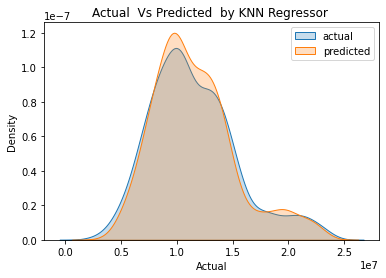

In [110]:
sns.kdeplot(data=df_knn, x='Actual', label='actual', shade=True)
sns.kdeplot(data=df_knn, x='Predicted', label='predicted', shade=True)
plt.title("Actual  Vs Predicted  by KNN Regressor ")
plt.legend()
plt.show()

Model has 0.95 r2 score, the train score is 0.97 and test score is 0.95

DECISION TREE REGRESSOR

In [111]:
decision = DecisionTreeRegressor(max_depth=8).fit(X_train, Y_train)
decision_predict = decision.predict(X_test)

In [112]:
decision_score = metrics.r2_score(Y_test, decision_predict)
print(" Training score: {:.2f}".format(decision.score(X_train, Y_train)))
print(" Test score: {:.2f}".format(decision.score(X_test, Y_test)))
print("R2 score: {:.2f}".format(decision_score))


 Training score: 0.97
 Test score: 0.96
R2 score: 0.96


In [113]:
df_decision=pd.DataFrame({"Actual":Y_test,"Predicted":decision_predict})
df_decision

,Actual,Predicted
3410,9305778,9.797666e+06
5610,11420800,1.031442e+07
72,9466999,1.118954e+07
4268,13685704,1.274353e+07
2399,21694013,2.144615e+07
...,...,...
1422,15210626,1.375625e+07
5422,11560489,1.090417e+07
3056,23614136,2.284729e+07
5404,17633369,1.708384e+07


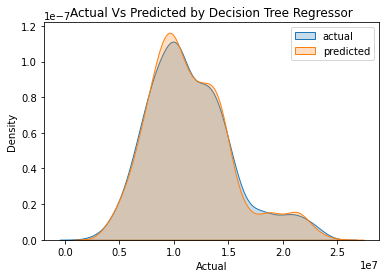

In [114]:
sns.kdeplot(data=df_decision, x='Actual', label='actual', shade=True)
sns.kdeplot(data=df_decision, x='Predicted', label='predicted', shade=True)
plt.title("Actual Vs Predicted by Decision Tree Regressor")
plt.legend()
plt.show()

The predictions of Decision Tree looks nearly accurate and at some point it is higher, the model also has better r2 score

RANDOM FOREST REGRESSOR

In [115]:
randomf = RandomForestRegressor(random_state=0).fit(X_train, Y_train)
randomf_predict = randomf.predict(X_test)

In [116]:
randomf_score = metrics.r2_score(Y_test, randomf_predict)
print(" Training score: {:.2f}".format(randomf.score(X_train, Y_train)))
print(" Test score: {:.2f}".format(randomf.score(X_test, Y_test)))
print(" R2 score: {:.2f}".format(randomf_score))

 Training score: 1.00
 Test score: 0.99
 R2 score: 0.99


In [117]:
df_randomf=pd.DataFrame({"Actual":Y_test,"Predicted":randomf_predict})
df_randomf

,Actual,Predicted
3410,9305778,8878882.49
5610,11420800,10974514.96
72,9466999,9947434.00
4268,13685704,13437757.78
2399,21694013,21977306.87
...,...,...
1422,15210626,14456825.30
5422,11560489,11183583.10
3056,23614136,23345188.59
5404,17633369,17327768.68


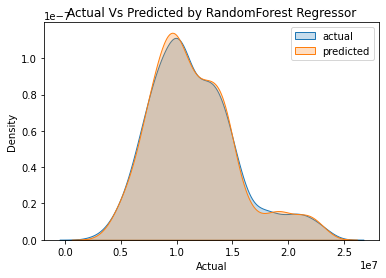

In [118]:
sns.kdeplot(data=df_randomf, x='Actual', label='actual', shade=True)
sns.kdeplot(data=df_randomf, x='Predicted', label='predicted', shade=True)
plt.title("Actual Vs Predicted by RandomForest Regressor")
plt.legend()
plt.show()

Overall prediction is nearer to actual values

# XG BOOST REGRESSOR

In [125]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.1,0.11,0.12,0.13,0.15,0.3,0.2,0.4,0.5,1]:
  xgboo=xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0)
  xgboo.fit(X_train,Y_train)
  xgboo.score(X_test,Y_test)
  print("learning rate: ",lr,"Train Score: ",xgboo.score(X_train,Y_train),"Cross val score:",np.mean(cross_val_score(xgboo,X_train,Y_train,cv=10)))

learning rate:  0.01 Train Score:  -0.37457575867999915 Cross val score: -0.38166428966594
learning rate:  0.02 Train Score:  0.7477933451016929 Cross val score: 0.7443789549419565
learning rate:  0.03 Train Score:  0.9250422627323027 Cross val score: 0.9224956170961098
learning rate:  0.04 Train Score:  0.9619945563493508 Cross val score: 0.9598958327550466
learning rate:  0.05 Train Score:  0.9744910386579778 Cross val score: 0.9721683782632798
learning rate:  0.06 Train Score:  0.9803736989451848 Cross val score: 0.9783648361973073
learning rate:  0.07 Train Score:  0.9848980247114425 Cross val score: 0.9824815006946878
learning rate:  0.09 Train Score:  0.9897609417435763 Cross val score: 0.9882275427098464
learning rate:  0.1 Train Score:  0.9913255295435695 Cross val score: 0.9900104974231322
learning rate:  0.11 Train Score:  0.9927094807813773 Cross val score: 0.9914914024810354
learning rate:  0.12 Train Score:  0.993788256564472 Cross val score: 0.9922337488817972
learning ra

In [134]:
xgboo=xgb.XGBRegressor(learning_rate=0.4,n_estimators=100)
xgboo.fit(X_train,Y_train)
xgboo_predict = xgboo.predict(X_test)
xgboo_score = metrics.r2_score(Y_test, xgboo_predict)
print(" Training score: {:.2f}".format(xgboo.score(X_train, Y_train)))
print(" Test score: {:.2f}".format(xgboo.score(X_test, Y_test)))
print(" R2 score: {:.2f}".format(xgboo_score))

[15:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Training score: 1.00
 Test score: 1.00
 R2 score: 1.00


In [127]:
df_xgboo=pd.DataFrame({"Actual":Y_test,"Predicted":xgboo_predict})
df_xgboo

,Actual,Predicted
3410,9305778,9297268.0
5610,11420800,11261896.0
72,9466999,9747818.0
4268,13685704,13599310.0
2399,21694013,21264226.0
...,...,...
1422,15210626,14792644.0
5422,11560489,11547210.0
3056,23614136,23518530.0
5404,17633369,17448870.0


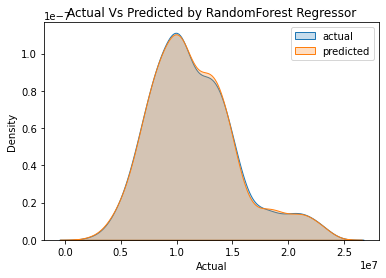

In [128]:
sns.kdeplot(data=df_xgboo, x='Actual', label='actual', shade=True)
sns.kdeplot(data=df_xgboo, x='Predicted', label='predicted', shade=True)
plt.title("Actual Vs Predicted by RandomForest Regressor")
plt.legend()
plt.show()

Actual and predicted values are more or less same .Thus we can predict that this model fits perfectly.

PLOTTING R2 SCORE GRAPH AND CHOOSING BEST MODEL

In [129]:
bestmod = pd.DataFrame({
    'model': "Linear  KNN DecisionTree RandomForerst XGBoost".split(),
    'r2_score': [linear_score, knn_score, decision_score, randomf_score, xgboo_score]})

bestmod

,model,r2_score
0,Linear,0.922571
1,KNN,0.949544
2,DecisionTree,0.957002
3,RandomForerst,0.988334
4,XGBoost,0.996304


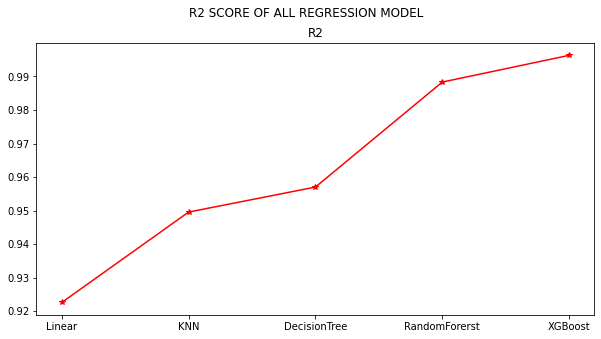

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
fig.suptitle("R2 SCORE OF ALL REGRESSION MODEL")
ax.plot(bestmod.model, bestmod.r2_score, color='red', marker='*')
ax.set_title("R2")
plt.show()

R2 score of XG BOOST gives a good hike .thus its the best model 

CONCLUSION


Sale price column has some outliers, but we can't drop them as they are the target

House size and number of rooms are highly co-related to sales price.

More number of houses were sold in Chrompet and Karapakkam.

Frequently houses are purchased in  RH, RL and RM municipality zone. These areas have better access.

XG BOOST  is a better model with a coefficient of determination of 99.6 which is better than the other regression models